A good resource for learning and practicing about pandas and numpy

[Python for Data Analysis_ Data Wrangling with pandas, NumPy, and Jupyter (2022, O'Reilly Media)](https://drive.google.com/file/d/1GA3KRXSIXI9p5DCU-ADDnxkWuL1ZeXNK/view?usp=sharing)

-----------

## sqlite3

Connection

In [ ]:
import sqlite3
con = sqlite3.connect("tutorial.db")

make an object to have a connection to database

In [ ]:
cur = con.cursor()

write a simple quary and execute it

In [ ]:
cur.execute("CREATE TABLE movie(title, year, score)")

fetch all the executed rocords from quaries

In [ ]:
res = cur.execute("SELECT name FROM sqlite_master")
res.fetchone()

In [ ]:
res = cur.execute("SELECT name FROM sqlite_master WHERE name='spam'")
res.fetchone() is None

insert rows to table

In [ ]:
cur.execute("""
    INSERT INTO movie VALUES
        ('Monty Python and the Holy Grail', 1975, 8.2),
        ('And Now for Something Completely Different', 1971, 7.5)
""")

use commit method to finalize what we have sent to database by executing our quaries

In [ ]:
con.commit()

execute multiple quaries by executemany method

In [ ]:
data = [
    ("Monty Python Live at the Hollywood Bowl", 1982, 7.9),
    ("Monty Python's The Meaning of Life", 1983, 7.5),
    ("Monty Python's Life of Brian", 1979, 8.0),
]
cur.executemany("INSERT INTO movie VALUES(?, ?, ?)", data)
con.commit()

In [ ]:
for row in cur.execute("SELECT year, title FROM movie ORDER BY year"):
    print(row)

close connection we made before and create a new connection

In [ ]:
con.close()
new_con = sqlite3.connect("tutorial.db")
new_cur = new_con.cursor()
res = new_cur.execute("SELECT title, year FROM movie ORDER BY score DESC")
title, year = res.fetchone()
print(f'The highest scoring Monty Python movie is {title!r}, released in {year}')

----

In [ ]:
%pip install sklearn

# Imputer
1. Simple Imputer

2. KNN

3. Iterative Imputer(Regression)


## Simple Imputer

Replace missing values using a descriptive statistic (e.g. mean, median, or most frequent) along each column, or using a constant value.

In [4]:
import numpy as np
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
train = [[7, 2, 3], [4, np.nan, 6], [10, 5, 9]]

imputer.fit(train)

SimpleImputer()

In [5]:
X = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]
print(imputer.transform(X))

[[ 7.   2.   3. ]
 [ 4.   3.5  6. ]
 [10.   3.5  9. ]]


## KNN

Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set. Two samples are close if the features that neither is missing are close.

In [10]:
import numpy as np
from sklearn.impute import KNNImputer


X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]
imputer = KNNImputer(n_neighbors=2)

In [9]:
imputer.fit_transform(X)

array([[1., 2., 5.],
       [3., 4., 3.],
       [4., 6., 5.],
       [8., 8., 7.]])

## Iterative Imputer

Multivariate imputer that estimates each feature from all the others.

A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion.

In [11]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=0)

imputer.fit([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])

IterativeImputer(random_state=0)

X = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]

imputer.transform(X)

array([[ 6.95847623,  2.        ,  3.        ],
       [ 4.        ,  2.6000004 ,  6.        ],
       [10.        ,  4.99999933,  9.        ]])

# Outlier Detection

## Isolation Forest

The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

In [13]:
from sklearn.ensemble import IsolationForest


X = [[-1.1], [0.3], [0.5], [100]]
clf = IsolationForest(random_state=0).fit(X)
clf.predict([[0.1], [0], [90]])

array([ 1,  1, -1])

## EllipticEnvelope

An object for detecting outliers in a Gaussian distributed dataset.

In [14]:
import numpy as np
from sklearn.covariance import EllipticEnvelope

true_cov = np.array([[.8, .3],
                      [.3, .4]])
X = np.random.RandomState(0).multivariate_normal(mean=[0, 0],
                                                  cov=true_cov,
                                                  size=500)

cov = EllipticEnvelope(random_state=0).fit(X)

# predict returns 1 for an inlier and -1 for an outlier
cov.predict([[0, 0],
              [3, 3]])

array([ 1, -1])

## OneClassSVM

Unsupervised Outlier Detection.

Estimate the support of a high-dimensional distribution.

The implementation is based on libsvm.

In [15]:
from sklearn.svm import OneClassSVM

X = [[0], [0.44], [0.45], [0.46], [1]]
clf = OneClassSVM(gamma='auto').fit(X)
clf.predict(X)

array([-1,  1,  1,  1, -1], dtype=int64)

## LocalOutlierFactor

Unsupervised Outlier Detection using the Local Outlier Factor (LOF).

The anomaly score of each sample is called the Local Outlier Factor. It measures the local deviation of the density of a given sample with respect to its neighbors. It is local in that the anomaly score depends on how isolated the object is with respect to the surrounding neighborhood. More precisely, locality is given by k-nearest neighbors, whose distance is used to estimate the local density. By comparing the local density of a sample to the local densities of its neighbors, one can identify samples that have a substantially lower density than their neighbors. These are considered outliers.

In [17]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

X = [[-1.1], [0.2], [101.1], [0.3]]
clf = LocalOutlierFactor(n_neighbors=2)
clf.fit_predict(X)

array([ 1,  1, -1,  1])

# Order Encoding

## LabelEncoder

Encode target labels with value between 0 and n_classes-1.

This transformer should be used to encode target values, i.e. y, and not the input X.

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit([1, 2, 2, 6])
le.transform([1, 1, 2, 6])

array([0, 0, 1, 2], dtype=int64)

In [21]:
le.inverse_transform([0, 0, 1, 2])

array([1, 1, 2, 6])

In [23]:
le = LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])
list(le.classes_)

['amsterdam', 'paris', 'tokyo']

In [24]:
le.transform(["tokyo", "tokyo", "paris"])

array([2, 2, 1])

In [25]:
list(le.inverse_transform([2, 2, 1]))

['tokyo', 'tokyo', 'paris']

## OneHotEncoder

Encode categorical features as a one-hot numeric array.

The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features. The features are encoded using a one-hot (aka ‘one-of-K’ or ‘dummy’) encoding scheme. This creates a binary column for each category and returns a sparse matrix or dense array (depending on the sparse_output parameter)

In [30]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
X = [['Male', 1], ['Female', 3], ['Female', 2]]
enc.fit(X)
enc.categories_

[array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]

In [34]:
enc.transform([['Female', 1], ['Male', 2]]).toarray()

array([[1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [36]:
enc.inverse_transform([[1, 0, 1, 0, 0], [0, 1, 0, 1, 0]])

array([['Female', 1],
       ['Male', 2]], dtype=object)

In [37]:
enc.get_feature_names_out(['gender', 'group'])

array(['gender_Female', 'gender_Male', 'group_1', 'group_2', 'group_3'],
      dtype=object)

## OrdinalEncoder

Encode categorical features as an integer array.

The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features. The features are converted to ordinal integers. This results in a single column of integers (0 to n_categories - 1) per feature.

In [38]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X = [['Male', 1], ['Female', 3], ['Female', 2]]
enc.fit(X)

OrdinalEncoder()

In [40]:
enc.transform([['Female', 3], ['Male', 1]])

array([[0., 2.],
       [1., 0.]])

In [42]:
enc.inverse_transform([[0, 2], [1, 0]])

array([['Female', 3],
       ['Male', 1]], dtype=object)

## ColumnTransformer

Applies transformers to columns of an array or pandas DataFrame.

This estimator allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space. This is useful for heterogeneous or columnar data, to combine several feature extraction mechanisms or transformations into a single transformer.

In [43]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer

ct = ColumnTransformer(
    [("norm1", Normalizer(norm='l1'), [0, 1]),
     ("norm2", Normalizer(norm='l1'), slice(2, 4))])

X = np.array([[0., 1., 2., 2.],
              [1., 1., 0., 1.]])

# Normalizer scales each row of X to unit norm. A separate scaling
# is applied for the two first and two last elements of each
# row independently.
ct.fit_transform(X)

array([[0. , 1. , 0.5, 0.5],
       [0.5, 0.5, 0. , 1. ]])

# Scalers

1. Min - Max
2. Standard (Much less effected by outliers)

## MinMaxScaler

Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min

MinMaxScaler doesn’t reduce the effect of outliers, but it linearily scales them down into a fixed range, where the largest occuring data point corresponds to the maximum value and the smallest one corresponds to the minimum value.

In [49]:
from sklearn.preprocessing import MinMaxScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
scaler.fit(data)

MinMaxScaler()

In [50]:
scaler.data_max_

array([ 1., 18.])

In [51]:
scaler.transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [52]:
scaler.transform([[2, 2]])

array([[1.5, 0. ]])

## Standardize

Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

    z = (x - u) / s

StandardScaler is sensitive to outliers, and the features may scale differently from each other in the presence of outliers. 

In [56]:
from sklearn.preprocessing import StandardScaler
data = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler = StandardScaler()
scaler.fit(data)

StandardScaler()

In [57]:
scaler.transform(data)

array([[-1., -1.],
       [-1., -1.],
       [ 1.,  1.],
       [ 1.,  1.]])

# Make Column Selector

Create a callable to select columns to be used with ColumnTransformer.

make_column_selector can select columns based on datatype or the columns name with a regex. When using multiple selection criteria, all criteria must match for a column to be selected.

In [59]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
import numpy as np
import pandas as pd  

X = pd.DataFrame({'city': ['London', 'London', 'Paris', 'Sallisaw'],
                  'rating': [5, 3, 4, 5]})  
ct = make_column_transformer(
      (StandardScaler(),
       make_column_selector(dtype_include=np.number)),  # rating
      (OneHotEncoder(),
       make_column_selector(dtype_include=object)))  # city
ct.fit_transform(X)  

array([[ 0.90453403,  1.        ,  0.        ,  0.        ],
       [-1.50755672,  1.        ,  0.        ,  0.        ],
       [-0.30151134,  0.        ,  1.        ,  0.        ],
       [ 0.90453403,  0.        ,  0.        ,  1.        ]])

## Pipeline

Pipeline of transforms with a final estimator.

Sequentially apply a list of transforms and a final estimator. Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement fit and transform methods. The final estimator only needs to implement fit. The transformers in the pipeline can be cached using memory argument.

In [60]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline



X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0)

In [61]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set

pipe.fit(X_train, y_train).score(X_test, y_test)

0.88

In [62]:
# An estimator's parameter can be set using '__' syntax
pipe.set_params(svc__C=10).fit(X_train, y_train).score(X_test, y_test)

0.76

# Melt, Pivot, Unpivot

## Pandas Pivot

The pivot() function is used to reshaped a given DataFrame organized by given index / column values. This function does not support data aggregation, multiple values will result in a MultiIndex in the columns.

Syntax:

DataFrame.pivot(self, index=None, columns=None, values=None)

In [63]:
import numpy as np
import pandas as pd

df = pd.DataFrame({'fff': ['one', 'one', 'one', 'two', 'two',
                           'two'],
                   'bbb': ['P', 'Q', 'R', 'P', 'Q', 'R'],
                   'baa': [2, 3, 4, 5, 6, 7],
                   'zzz': ['h', 'i', 'j', 'k', 'l', 'm']})
df

,fff,bbb,baa,zzz
0,one,P,2,h
1,one,Q,3,i
2,one,R,4,j
3,two,P,5,k
4,two,Q,6,l
5,two,R,7,m


![](https://www.w3resource.com/w3r_images/pandas-dataframe-pivot.svg)

In [64]:
df.pivot(index='fff', columns='bbb', values='baa')

bbb,P,Q,R
fff,,,
one,2,3,4
two,5,6,7


![](https://www.w3resource.com/w3r_images/pandas-dataframe-pivot-1.svg)

In [68]:
df.pivot(index='fff', columns='bbb', values=['baa', 'zzz'])

baa       zzz      
bbb   P  Q  R   P  Q  R
fff                    
one   2  3  4   h  i  j
two   5  6  7   k  l  m

![](https://www.w3resource.com/w3r_images/pandas-dataframe-pivot-2.svg)

## Melt() function

The melt() function is used to unpivot a given DataFrame from wide format to long format, optionally leaving identifier variables set.

In [69]:
import numpy as np
import pandas as pd

In [70]:
df = pd.DataFrame({'P': {0: 'p', 1: 'q', 2: 'r'},
                   'Q': {0: 1, 1: 3, 2: 5},
                   'R': {0: 2, 1: 4, 2: 6}})
df

,P,Q,R
0,p,1,2
1,q,3,4
2,r,5,6


In [72]:
df.melt(id_vars=['P'], value_vars=['Q'])

,P,variable,value
0,p,Q,1
1,q,Q,3
2,r,Q,5


In [73]:
df.melt(id_vars=['P'], value_vars=['Q', 'R'])

,P,variable,value
0,p,Q,1
1,q,Q,3
2,r,Q,5
3,p,R,2
4,q,R,4
5,r,R,6


## explode()

The explode() function is used to transform each element of a list-like to a row, replicating the index values.

In [74]:
import numpy as np
import pandas as pd

df = pd.DataFrame({'P': [[2, 3, 4], 'fff', [], [4, 5]], 'Q': 2})
df

,P,Q
0,"[2, 3, 4]",2
1,fff,2
2,[],2
3,"[4, 5]",2


![](https://www.w3resource.com/w3r_images/pandas-dataframe-explode.png)

In [75]:
df = pd.DataFrame({'P': [[2, 3, 4], 'fff', [], [4, 5]], 'Q': 2})
df.explode('P')

,P,Q
0,2,2
0,3,2
0,4,2
1,fff,2
2,NaN,2
3,4,2
3,5,2


![](https://www.w3resource.com/w3r_images/pandas-dataframe-explode-1.png)

## pandas.DataFrame.query


Query the columns of a DataFrame with a boolean expression.

In [126]:
df = pd.DataFrame({'A': range(1, 6),

                   'B': range(10, 0, -2),

                   'C C': range(10, 5, -1)})
df

,A,B,C C
0,1,10,10
1,2,8,9
2,3,6,8
3,4,4,7
4,5,2,6


In [129]:
df.query('A > B')

,A,B,C C
4,5,2,6


In [127]:
df[df.A > df.B]

,A,B,C C
4,5,2,6


In [128]:
df.query('B == `C C`')

,A,B,C C
0,1,10,10


### More example

In [131]:
# Create DataFrame
import pandas as pd
import numpy as np
technologies= {
    'Courses':["Spark","PySpark","Hadoop","Python","Pandas"],
    'Fee' :[22000,25000,23000,24000,26000],
    'Duration':['30days','50days','30days', None,np.nan],
    'Discount':[1000,2300,1000,1200,2500]
          }
df = pd.DataFrame(technologies)
df

,Courses,Fee,Duration,Discount
0,Spark,22000,30days,1000
1,PySpark,25000,50days,2300
2,Hadoop,23000,30days,1000
3,Python,24000,None,1200
4,Pandas,26000,NaN,2500


In [132]:
df.query("Courses == 'Spark'")

,Courses,Fee,Duration,Discount
0,Spark,22000,30days,1000


In [134]:
df.query("Courses in ('Spark','PySpark')")

,Courses,Fee,Duration,Discount
0,Spark,22000,30days,1000
1,PySpark,25000,50days,2300


# Table visulize
---

## Formatting the Display

In [2]:
%pip install Jinja2

  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Obtaining dependency information for MarkupSafe>=2.0 from https://files.pythonhosted.org/packages/be/bb/08b85bc194034efbf572e70c3951549c8eca0ada25363afc154386b5390a/MarkupSafe-2.1.3-cp311-cp311-win_amd64.whl.metadata
Using cached MarkupSafe-2.1.3-cp311-cp311-win_amd64.whl (17 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl

df = pd.DataFrame({
    "strings": ["Adam", "Mike"],
    "ints": [1, 3],
    "floats": [1.123, 1000.23]
})
df.style \
  .format(precision=3, thousands=".", decimal=",") \
  .format_index(str.upper, axis=1) \
  .relabel_index(["row 1", "row 2"], axis=0)

,STRINGS,INTS,FLOATS
row 1,Adam,1,"1,123"
row 2,Mike,3,"1.000,230"


In [2]:
weather_df = pd.DataFrame(np.random.rand(10,2)*5,
                          index=pd.date_range(start="2021-01-01", periods=10),
                          columns=["Tokyo", "Beijing"])

def rain_condition(v):
    if v < 1.75:
        return "Dry"
    elif v < 2.75:
        return "Rain"
    return "Heavy Rain"

def make_pretty(styler):
    styler.set_caption("Weather Conditions")
    styler.format(rain_condition)
    styler.format_index(lambda v: v.strftime("%A"))
    styler.background_gradient(axis=None, vmin=1, vmax=5, cmap="YlGnBu")
    return styler

weather_df

,Tokyo,Beijing
2021-01-01,4.241692,4.606167
2021-01-02,2.102589,2.529845
2021-01-03,4.653678,1.734745
2021-01-04,4.174940,4.837378
2021-01-05,0.681953,1.874010
2021-01-06,0.505734,3.393434
2021-01-07,0.080450,0.807169
2021-01-08,0.494767,4.920938
2021-01-09,3.969437,1.428277
2021-01-10,0.828718,4.608179


In [3]:
weather_df.loc["2021-01-04":"2021-01-08"].style.pipe(make_pretty)

,Tokyo,Beijing
Monday,Heavy Rain,Heavy Rain
Tuesday,Dry,Rain
Wednesday,Dry,Heavy Rain
Thursday,Dry,Dry
Friday,Dry,Heavy Rain


In [5]:
df = pd.DataFrame(np.random.randn(5, 5))
df.style \
  .hide(subset=[0, 2, 4], axis=0) \
  .hide(subset=[0, 2, 4], axis=1)

,1,3
1,-0.094678,-0.770491
3,0.058352,0.429448


In [6]:
show = [0, 2, 4]
df.style \
  .hide([row for row in df.index if row not in show], axis=0) \
  .hide([col for col in df.columns if col not in show], axis=1)

,0,2,4
0,1.105038,0.876610,0.875840
2,0.688942,0.847382,0.267748
4,-1.850733,-0.297020,-0.272520


In [7]:
summary_styler = df.agg(["sum", "mean"]).style \
                   .format(precision=3) \
                   .relabel_index(["Sum", "Average"])
df.style.format(precision=1).concat(summary_styler)

,0,1,2,3,4
0,1.1,2.1,0.9,0.9,0.9
1,-1.0,-0.1,-0.1,-0.8,-1.1
2,0.7,0.5,0.8,0.7,0.3
3,-0.3,0.1,0.8,0.4,2.6
4,-1.9,-0.9,-0.3,2.0,-0.3
Sum,-1.433,1.638,2.080,3.229,2.325
Average,-0.287,0.328,0.416,0.646,0.465


## Styler Object and HTML

In [8]:
df = pd.DataFrame([[38.0, 2.0, 18.0, 22.0, 21, np.nan],[19, 439, 6, 452, 226,232]],
                  index=pd.Index(['Tumour (Positive)', 'Non-Tumour (Negative)'], name='Actual Label:'),
                  columns=pd.MultiIndex.from_product([['Decision Tree', 'Regression', 'Random'],['Tumour', 'Non-Tumour']], names=['Model:', 'Predicted:']))
df.style

In [10]:
s = df.style.format('{:.0f}').hide([('Random', 'Tumour'), ('Random', 'Non-Tumour')], axis="columns")
s

In [11]:
cell_hover = {  # for row hover use <tr> instead of <td>
    'selector': 'td:hover',
    'props': [('background-color', '#ffffb3')]
}
index_names = {
    'selector': '.index_name',
    'props': 'font-style: italic; color: darkgrey; font-weight:normal;'
}
headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #000066; color: white;'
}
s.set_table_styles([cell_hover, index_names, headers])

In [12]:
s.set_table_styles([
    {'selector': 'th.col_heading', 'props': 'text-align: center;'},
    {'selector': 'th.col_heading.level0', 'props': 'font-size: 1.5em;'},
    {'selector': 'td', 'props': 'text-align: center; font-weight: bold;'},
], overwrite=False)

In [13]:
s.set_table_styles({
    ('Regression', 'Tumour'): [{'selector': 'th', 'props': 'border-left: 1px solid white'},
                               {'selector': 'td', 'props': 'border-left: 1px solid #000066'}]
}, overwrite=False, axis=0)

In [15]:
s.set_table_styles([  # create internal CSS classes
    {'selector': '.true', 'props': 'background-color: #e6ffe6;'},
    {'selector': '.false', 'props': 'background-color: #ffe6e6;'},
], overwrite=False)
cell_color = pd.DataFrame([['true ', 'false ', 'true ', 'false '],
                           ['false ', 'true ', 'false ', 'true ']],
                          index=df.index,
                          columns=df.columns[:4])
s.set_td_classes(cell_color)

## Styler Functions

In [21]:
np.random.seed(0)
df2 = pd.DataFrame(np.random.randn(10,4), columns=['A','B','C','D'])
df2.style

,A,B,C,D
0,1.764052,0.400157,0.978738,2.240893
1,1.867558,-0.977278,0.950088,-0.151357
2,-0.103219,0.410599,0.144044,1.454274
3,0.761038,0.121675,0.443863,0.333674
4,1.494079,-0.205158,0.313068,-0.854096
5,-2.552990,0.653619,0.864436,-0.742165
6,2.269755,-1.454366,0.045759,-0.187184
7,1.532779,1.469359,0.154947,0.378163
8,-0.887786,-1.980796,-0.347912,0.156349
9,1.230291,1.202380,-0.387327,-0.302303


In [24]:
def style_negative(v, props=''):
    return props if v < 0 else None
s2 = df2.style.applymap(style_negative, props='color:red;')\
              .applymap(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0.3) else None)
s2

,A,B,C,D
0,1.764052,0.400157,0.978738,2.240893
1,1.867558,-0.977278,0.950088,-0.151357
2,-0.103219,0.410599,0.144044,1.454274
3,0.761038,0.121675,0.443863,0.333674
4,1.494079,-0.205158,0.313068,-0.854096
5,-2.552990,0.653619,0.864436,-0.742165
6,2.269755,-1.454366,0.045759,-0.187184
7,1.532779,1.469359,0.154947,0.378163
8,-0.887786,-1.980796,-0.347912,0.156349
9,1.230291,1.202380,-0.387327,-0.302303


In [25]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')


s2.apply(highlight_max, props='color:white;background-color:darkblue', axis=0)

,A,B,C,D
0,1.764052,0.400157,0.978738,2.240893
1,1.867558,-0.977278,0.950088,-0.151357
2,-0.103219,0.410599,0.144044,1.454274
3,0.761038,0.121675,0.443863,0.333674
4,1.494079,-0.205158,0.313068,-0.854096
5,-2.552990,0.653619,0.864436,-0.742165
6,2.269755,-1.454366,0.045759,-0.187184
7,1.532779,1.469359,0.154947,0.378163
8,-0.887786,-1.980796,-0.347912,0.156349
9,1.230291,1.202380,-0.387327,-0.302303


In [26]:
s2.apply(highlight_max, props='color:white;background-color:pink;', axis=1)\
  .apply(highlight_max, props='color:white;background-color:purple', axis=None)

,A,B,C,D
0,1.764052,0.400157,0.978738,2.240893
1,1.867558,-0.977278,0.950088,-0.151357
2,-0.103219,0.410599,0.144044,1.454274
3,0.761038,0.121675,0.443863,0.333674
4,1.494079,-0.205158,0.313068,-0.854096
5,-2.552990,0.653619,0.864436,-0.742165
6,2.269755,-1.454366,0.045759,-0.187184
7,1.532779,1.469359,0.154947,0.378163
8,-0.887786,-1.980796,-0.347912,0.156349
9,1.230291,1.202380,-0.387327,-0.302303


## Tooltips and Captions

In [37]:
s.set_caption("Confusion matrix for multiple cancer prediction models.")\
 .set_table_styles([{
     'selector': 'caption',
     'props': 'caption-side: bottom; font-size:1.25em;'
 }], overwrite=False)

In [38]:
tt = pd.DataFrame([['This model has a very strong true positive rate',
                    "This model's total number of false negatives is too high"]],
                  index=['Tumour (Positive)'], columns=df.columns[[0,3]])
s.set_tooltips(tt, props='visibility: hidden; position: absolute; z-index: 1; border: 1px solid #000066;'
                         'background-color: white; color: #000066; font-size: 0.8em;'
                         'transform: translate(0px, -24px); padding: 0.6em; border-radius: 0.5em;')

## Finer Control with Slicing

In [41]:
df3 = pd.DataFrame(np.random.randn(4,4),
                   pd.MultiIndex.from_product([['A', 'B'], ['r1', 'r2']]),
                   columns=['c1','c2','c3','c4'])
df3

c1        c2        c3        c4
A r1 -1.048553 -1.420018 -1.706270  1.950775
  r2 -0.509652 -0.438074 -1.252795  0.777490
B r1 -1.613898 -0.212740 -0.895467  0.386902
  r2 -0.510805 -1.180632 -0.028182  0.428332

In [42]:
slice_ = ['c3', 'c4']
df3.style.apply(highlight_max, props='color:red;', axis=0, subset=slice_)\
         .set_properties(**{'background-color': '#ffffb3'}, subset=slice_)

In [43]:
idx = pd.IndexSlice
slice_ = idx[idx[:,'r1'], idx['c2':'c4']]
df3.style.apply(highlight_max, props='color:red;', axis=0, subset=slice_)\
         .set_properties(**{'background-color': '#ffffb3'}, subset=slice_)

## Builtin Styles

In [44]:
df2.iloc[0,2] = np.nan
df2.iloc[4,3] = np.nan
df2.loc[:4].style.highlight_null(color='yellow')

,A,B,C,D
0,1.764052,0.400157,nan,2.240893
1,1.867558,-0.977278,0.950088,-0.151357
2,-0.103219,0.410599,0.144044,1.454274
3,0.761038,0.121675,0.443863,0.333674
4,1.494079,-0.205158,0.313068,nan


In [45]:
df2.loc[:4].style.highlight_max(axis=1, props='color:white; font-weight:bold; background-color:darkblue;')

,A,B,C,D
0,1.764052,0.400157,nan,2.240893
1,1.867558,-0.977278,0.950088,-0.151357
2,-0.103219,0.410599,0.144044,1.454274
3,0.761038,0.121675,0.443863,0.333674
4,1.494079,-0.205158,0.313068,nan


In [46]:
left = pd.Series([1.0, 0.0, 1.0], index=["A", "B", "D"])
df2.loc[:4].style.highlight_between(left=left, right=1.5, axis=1, props='color:white; background-color:purple;')

,A,B,C,D
0,1.764052,0.400157,nan,2.240893
1,1.867558,-0.977278,0.950088,-0.151357
2,-0.103219,0.410599,0.144044,1.454274
3,0.761038,0.121675,0.443863,0.333674
4,1.494079,-0.205158,0.313068,nan


In [47]:
df2.loc[:4].style.highlight_quantile(q_left=0.85, axis=None, color='yellow')

,A,B,C,D
0,1.764052,0.400157,nan,2.240893
1,1.867558,-0.977278,0.950088,-0.151357
2,-0.103219,0.410599,0.144044,1.454274
3,0.761038,0.121675,0.443863,0.333674
4,1.494079,-0.205158,0.313068,nan


In [48]:
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)

df2.style.background_gradient(cmap=cm)

,A,B,C,D
0,1.764052,0.400157,nan,2.240893
1,1.867558,-0.977278,0.950088,-0.151357
2,-0.103219,0.410599,0.144044,1.454274
3,0.761038,0.121675,0.443863,0.333674
4,1.494079,-0.205158,0.313068,nan
5,-2.552990,0.653619,0.864436,-0.742165
6,2.269755,-1.454366,0.045759,-0.187184
7,1.532779,1.469359,0.154947,0.378163
8,-0.887786,-1.980796,-0.347912,0.156349
9,1.230291,1.202380,-0.387327,-0.302303


In [49]:
df2.style.text_gradient(cmap=cm)

,A,B,C,D
0,1.764052,0.400157,nan,2.240893
1,1.867558,-0.977278,0.950088,-0.151357
2,-0.103219,0.410599,0.144044,1.454274
3,0.761038,0.121675,0.443863,0.333674
4,1.494079,-0.205158,0.313068,nan
5,-2.552990,0.653619,0.864436,-0.742165
6,2.269755,-1.454366,0.045759,-0.187184
7,1.532779,1.469359,0.154947,0.378163
8,-0.887786,-1.980796,-0.347912,0.156349
9,1.230291,1.202380,-0.387327,-0.302303


In [50]:
df2.loc[:4].style.set_properties(**{'background-color': 'black',
                           'color': 'lawngreen',
                           'border-color': 'white'})

,A,B,C,D
0,1.764052,0.400157,nan,2.240893
1,1.867558,-0.977278,0.950088,-0.151357
2,-0.103219,0.410599,0.144044,1.454274
3,0.761038,0.121675,0.443863,0.333674
4,1.494079,-0.205158,0.313068,nan


In [51]:
df2.style.bar(subset=['A', 'B'], color='#d65f5f')

,A,B,C,D
0,1.764052,0.400157,nan,2.240893
1,1.867558,-0.977278,0.950088,-0.151357
2,-0.103219,0.410599,0.144044,1.454274
3,0.761038,0.121675,0.443863,0.333674
4,1.494079,-0.205158,0.313068,nan
5,-2.552990,0.653619,0.864436,-0.742165
6,2.269755,-1.454366,0.045759,-0.187184
7,1.532779,1.469359,0.154947,0.378163
8,-0.887786,-1.980796,-0.347912,0.156349
9,1.230291,1.202380,-0.387327,-0.302303


In [52]:
df2.style.format('{:.3f}', na_rep="")\
         .bar(align=0, vmin=-2.5, vmax=2.5, cmap="bwr", height=50,
              width=60, props="width: 120px; border-right: 1px solid black;")\
         .text_gradient(cmap="bwr", vmin=-2.5, vmax=2.5)

,A,B,C,D
0,1.764,0.400,,2.241
1,1.868,-0.977,0.950,-0.151
2,-0.103,0.411,0.144,1.454
3,0.761,0.122,0.444,0.334
4,1.494,-0.205,0.313,
5,-2.553,0.654,0.864,-0.742
6,2.270,-1.454,0.046,-0.187
7,1.533,1.469,0.155,0.378
8,-0.888,-1.981,-0.348,0.156
9,1.230,1.202,-0.387,-0.302


In [54]:
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "4pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

In [55]:
np.random.seed(25)
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
bigdf = pd.DataFrame(np.random.randn(20, 25)).cumsum()

bigdf.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '1pt'})\
    .set_caption("Hover to magnify")\
    .format(precision=2)\
    .set_table_styles(magnify())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,0.23,1.03,-0.84,-0.59,-0.96,-0.22,-0.62,1.84,-2.05,0.87,-0.92,-0.23,2.15,-1.33,0.08,-1.25,1.20,-1.05,1.06,-0.42,2.29,-2.59,2.82,0.68,-1.58
1,-1.75,1.56,-1.13,-1.10,1.03,0.00,-2.46,3.45,-1.66,1.27,-0.52,-0.02,1.52,-1.09,-1.86,-1.13,-0.68,-0.81,0.35,-0.06,1.79,-2.82,2.26,0.78,0.44
2,-0.65,3.22,-1.76,0.52,2.20,-0.37,-3.00,3.73,-1.87,2.46,0.21,-0.24,-0.10,-0.78,-3.02,-0.82,-0.21,-0.23,0.86,-0.68,1.45,-4.89,3.03,1.91,0.61
3,-1.62,3.71,-2.31,0.43,4.17,-0.43,-3.86,4.16,-2.15,1.08,0.12,0.60,-0.89,0.27,-3.67,-2.71,-0.31,-1.59,1.35,-1.83,0.91,-5.80,2.81,2.11,0.28
4,-3.35,4.48,-1.86,-1.70,5.19,-1.02,-3.81,4.72,-0.72,1.08,-0.18,0.83,-0.22,-1.08,-4.27,-2.88,-0.97,-1.78,1.53,-1.80,2.21,-6.34,3.34,2.49,2.09
5,-0.84,4.23,-1.65,-2.00,5.34,-0.99,-4.13,3.94,-1.06,-0.94,1.24,0.09,-1.78,-0.11,-4.45,-0.85,-2.06,-1.35,0.80,-1.63,1.54,-6.51,2.80,2.14,3.77
6,-0.74,5.35,-2.11,-1.13,4.20,-1.85,-3.20,3.76,-3.22,-1.23,0.34,0.57,-1.82,0.54,-4.43,-1.83,-4.03,-2.62,-0.20,-4.68,1.93,-8.46,3.34,2.52,5.81
7,-0.44,4.69,-2.30,-0.21,5.93,-2.63,-1.83,5.46,-4.50,-3.16,-1.73,0.18,0.11,0.04,-5.99,-0.45,-6.20,-3.89,0.71,-3.95,0.67,-7.26,2.97,3.39,6.66
8,0.92,5.80,-3.33,-0.65,5.99,-3.19,-1.83,5.63,-3.53,-1.30,-1.61,0.82,-2.45,-0.40,-6.06,-0.52,-6.60,-3.48,-0.04,-4.60,0.51,-5.85,3.23,2.40,5.08
9,0.38,5.54,-4.49,-0.80,7.05,-2.64,-0.44,5.35,-1.96,-0.33,-0.80,0.26,-3.37,-0.82,-6.05,-2.61,-8.45,-4.45,0.41,-4.71,1.89,-6.93,2.14,3.00,5.16


# Time Series

In [56]:
import datetime

dti = pd.to_datetime(
        ["1/1/2018", np.datetime64("2018-01-01"), datetime.datetime(2018, 1, 1)])

dti

DatetimeIndex(['2018-01-01', '2018-01-01', '2018-01-01'], dtype='datetime64[ns]', freq=None)

In [57]:
dti = pd.date_range("2018-01-01", periods=3, freq="H")

dti

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00'],
              dtype='datetime64[ns]', freq='H')

In [58]:
dti = dti.tz_localize("UTC")

dti

DatetimeIndex(['2018-01-01 00:00:00+00:00', '2018-01-01 01:00:00+00:00',
               '2018-01-01 02:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='H')

In [59]:
dti.tz_convert("US/Pacific")

DatetimeIndex(['2017-12-31 16:00:00-08:00', '2017-12-31 17:00:00-08:00',
               '2017-12-31 18:00:00-08:00'],
              dtype='datetime64[ns, US/Pacific]', freq='H')

In [60]:
idx = pd.date_range("2018-01-01", periods=5, freq="H")

ts = pd.Series(range(len(idx)), index=idx)

ts

2018-01-01 00:00:00    0
2018-01-01 01:00:00    1
2018-01-01 02:00:00    2
2018-01-01 03:00:00    3
2018-01-01 04:00:00    4
Freq: H, dtype: int64

In [61]:
ts.resample("2H").mean()

2018-01-01 00:00:00    0.5
2018-01-01 02:00:00    2.5
2018-01-01 04:00:00    4.0
Freq: 2H, dtype: float64

In [63]:
friday = pd.Timestamp("2018-01-05")

friday.day_name()

'Friday'

In [64]:
saturday = friday + pd.Timedelta("1 day")

saturday.day_name()

'Saturday'

In [65]:
monday = friday + pd.offsets.BDay()

monday.day_name()

'Monday'

In [80]:
ts = pd.Series(pd.date_range("2023", freq="M", periods=3))
ts

0   2023-01-31
1   2023-02-28
2   2023-03-31
dtype: datetime64[ns]

In [69]:
pd.Series(pd.date_range("1/1/2011", freq="M", periods=3))

0   2011-01-31
1   2011-02-28
2   2011-03-31
dtype: datetime64[ns]

## NaT

pandas represents null date times, time deltas, and time spans as NaT which is useful for representing missing or null date like values and behaves similar as np.nan does for float data.

In [70]:
pd.Timestamp(pd.NaT)

NaT

In [71]:
idx = pd.date_range(start="2019-12-29", freq="D", periods=4)

idx.isocalendar()

,year,week,day
2019-12-29,2019,52,7
2019-12-30,2020,1,1
2019-12-31,2020,1,2
2020-01-01,2020,1,3


In [81]:
ts.shift(1)

0          NaT
1   2023-01-31
2   2023-02-28
dtype: datetime64[ns]

# Plotly

### basic plot in plotly

In [84]:
import plotly.express as px

fig = px.line(x=["a","b","c"], y=[1,3,2], title="sample figure")
fig.show()

## scater

In [85]:
import plotly.express as px
fig = px.scatter(x=[0, 1, 2, 3, 4], y=[0, 1, 4, 9, 16])
fig.show()

In [86]:
df = px.data.iris() # iris is a pandas DataFrame
fig = px.scatter(df, x="sepal_width", y="sepal_length")
fig.show()

In [87]:
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species",
                 size='petal_length', hover_data=['petal_width'])
fig.show()

In [88]:
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color='petal_length')
fig.show()

In [89]:
df = px.data.iris()
fig = px.scatter(df, x="sepal_length", y="sepal_width", marginal_x="histogram", marginal_y="rug")
fig.show()

In [90]:
df = px.data.tips()
fig = px.scatter(df, x="total_bill", y="tip", color="smoker", facet_col="sex", facet_row="time")
fig.show()

In [ ]:
%pip install statsmodels

In [93]:
df = px.data.tips()
fig = px.scatter(df, x="total_bill", y="tip", trendline="ols")
fig.show()

### Line plots with Plotly Express

In [94]:
import numpy as np

t = np.linspace(0, 2*np.pi, 100)

fig = px.line(x=t, y=np.cos(t), labels={'x':'t', 'y':'cos(t)'})
fig.show()

In [95]:
df = px.data.gapminder().query("continent == 'Oceania'")
fig = px.line(df, x='year', y='lifeExp', color='country')
fig.show()

In [96]:
df = px.data.gapminder().query("continent == 'Oceania'")
fig = px.line(df, x='year', y='lifeExp', color='country', markers=True)
fig.show()

## Line plots on Date axes

Line plots can be made on using any type of cartesian axis, including linear, logarithmic, categorical or date axes. Line plots on date axes are often called time-series charts.

In [97]:
df = px.data.stocks()
fig = px.line(df, x='date', y="GOOG")
fig.show()

In [98]:
df = px.data.gapminder().query("country in ['Canada', 'Botswana']")

fig = px.line(df, x="lifeExp", y="gdpPercap", color="country", text="year")
fig.update_traces(textposition="bottom right")
fig.show()

### Bar chart with Plotly Express

In [99]:
data_canada = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(data_canada, x='year', y='pop')
fig.show()

In [100]:
long_df = px.data.medals_long()

fig = px.bar(long_df, x="nation", y="count", color="medal", title="Long-Form Input")
fig.show()

In [101]:
df = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(df, x='year', y='pop',
             hover_data=['lifeExp', 'gdpPercap'], color='lifeExp',
             labels={'pop':'population of Canada'}, height=400)
fig.show()

In [102]:
df = px.data.gapminder().query("continent == 'Oceania'")
fig = px.bar(df, x='year', y='pop',
             hover_data=['lifeExp', 'gdpPercap'], color='country',
             labels={'pop':'population of Canada'}, height=400)
fig.show()

In [104]:
df = px.data.medals_long()
fig = px.bar(df, x="medal", y="count", color="nation", text_auto=True)
fig.show()

In [105]:
df = px.data.gapminder().query("continent == 'Europe' and year == 2007 and pop > 2.e6")
fig = px.bar(df, y='pop', x='country', text_auto='.2s',
            title="Default: various text sizes, positions and angles")
fig.show()

In [106]:
df = px.data.medals_long()

fig = px.bar(df, x="medal", y="count", color="nation",
             pattern_shape="nation", pattern_shape_sequence=[".", "x", "+"])
fig.show()

In [107]:
import plotly.graph_objects as go
animals=['giraffes', 'orangutans', 'monkeys']

fig = go.Figure(data=[
    go.Bar(name='SF Zoo', x=animals, y=[20, 14, 23]),
    go.Bar(name='LA Zoo', x=animals, y=[12, 18, 29])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

### Pie chart with plotly express

In [108]:
import plotly.express as px
df = px.data.gapminder().query("year == 2007").query("continent == 'Europe'")
df.loc[df['pop'] < 2.e6, 'country'] = 'Other countries' # Represent only large countries
fig = px.pie(df, values='pop', names='country', title='Population of European continent')
fig.show()

In [109]:
df = px.data.tips()
fig = px.pie(df, values='tip', names='day', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [110]:
df = px.data.tips()
fig = px.pie(df, values='tip', names='day', color='day',
             color_discrete_map={'Thur':'lightcyan',
                                 'Fri':'cyan',
                                 'Sat':'royalblue',
                                 'Sun':'darkblue'})
fig.show()

In [111]:
df = px.data.gapminder().query("year == 2007").query("continent == 'Americas'")
fig = px.pie(df, values='pop', names='country',
             title='Population of American continent',
             hover_data=['lifeExp'], labels={'lifeExp':'life expectancy'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### Donut Chart

In [112]:
import plotly.graph_objects as go

labels = ['Oxygen','Hydrogen','Carbon_Dioxide','Nitrogen']
values = [4500, 2500, 1053, 500]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

In [113]:
import plotly.graph_objects as go

labels = ['Oxygen','Hydrogen','Carbon_Dioxide','Nitrogen']
values = [4500, 2500, 1053, 500]

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0, 0.2, 0])])
fig.show()

### Sunburst charts

In [114]:
import plotly.graph_objects as go

fig =go.Figure(go.Sunburst(
    labels=["Eve", "Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    parents=["", "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve" ],
    values=[10, 14, 12, 10, 2, 6, 6, 4, 4],
))
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fig.show()

### Bubble chart with plotly.express

In [115]:
df = px.data.gapminder()

fig = px.scatter(df.query("year==2007"), x="gdpPercap", y="lifeExp",
	         size="pop", color="continent",
                 hover_name="country", log_x=True, size_max=60)
fig.show()

### Box Plot with plotly.express

In [116]:
df = px.data.tips()
fig = px.box(df, y="total_bill")
fig.show()

In [117]:
df = px.data.tips()
fig = px.box(df, x="time", y="total_bill")
fig.show()

In [118]:
df = px.data.tips()
fig = px.box(df, x="time", y="total_bill", points="all")
fig.show()

In [119]:
df = px.data.tips()

fig = px.box(df, x="day", y="total_bill", color="smoker")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

### Histograms with Plotly Express

In [120]:
df = px.data.tips()
fig = px.histogram(df, x="total_bill")
fig.show()

In [121]:
df = px.data.tips()
fig = px.histogram(df, x="total_bill", color="sex")
fig.show()

### Basic Distplot

In [122]:
import plotly.figure_factory as ff
import numpy as np
np.random.seed(1)

x = np.random.randn(1000)
hist_data = [x]
group_labels = ['distplot'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels)
fig.show()

### Plot Multiple Datasets

In [123]:
import plotly.figure_factory as ff
import numpy as np

# Add histogram data
x1 = np.random.randn(200) - 2
x2 = np.random.randn(200)
x3 = np.random.randn(200) + 2
x4 = np.random.randn(200) + 4

# Group data together
hist_data = [x1, x2, x3, x4]

group_labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)
fig.show()

### Plot Only Curve and Rug

In [124]:

x1 = np.random.randn(200) - 1
x2 = np.random.randn(200)
x3 = np.random.randn(200) + 1

hist_data = [x1, x2, x3]

group_labels = ['Group 1', 'Group 2', 'Group 3']
colors = ['#333F44', '#37AA9C', '#94F3E4']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors)

# Add title
fig.update_layout(title_text='Curve and Rug Plot')
fig.show()

### For More Information:
Check this website:

https://plotly.com/python/

## Cross tab

![](https://pbpython.com/images/crosstab_cheatsheet_header.png)

In [16]:
from seaborn import load_dataset
df = load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [17]:
pd.crosstab(df['time'], df['day'])

day,Thur,Fri,Sat,Sun
time,,,,
Lunch,61,7,0,0
Dinner,1,12,87,76


In [18]:
car_names = ['Suzuki','Honda','Toyota','Jeep','Tata']
fuel_type = ['diesel','petrol','diesel','petrol','diesel']
price = [10, 18, 27, 35, 15]

pd.crosstab(index=[car_names], columns=[fuel_type])

col_0,diesel,petrol
row_0,,
Honda,0,1
Jeep,0,1
Suzuki,1,0
Tata,1,0
Toyota,1,0


In [20]:
df = pd.read_excel('https://github.com/datagy/mediumdata/raw/master/sample_pivot.xlsx', parse_dates=['Date'])
df

,Date,Region,Type,Units,Sales
0,2020-07-11,East,Children's Clothing,18.0,306
1,2020-09-23,North,Children's Clothing,14.0,448
2,2020-04-02,South,Women's Clothing,17.0,425
3,2020-02-28,East,Children's Clothing,26.0,832
4,2020-03-19,West,Women's Clothing,3.0,33
...,...,...,...,...,...
995,2020-02-11,East,Children's Clothing,35.0,735
996,2020-12-25,North,Men's Clothing,NaN,1155
997,2020-08-31,South,Men's Clothing,13.0,208
998,2020-08-23,South,Women's Clothing,17.0,493


In [21]:
pd.crosstab(df.Region, df.Type)

Type,Children's Clothing,Men's Clothing,Women's Clothing
Region,,,
East,113,122,176
North,85,89,142
South,45,39,53
West,42,41,53


In [22]:
pd.crosstab(index = df.Region, columns = df.Type, values = df.Sales, aggfunc = 'mean')

Type,Children's Clothing,Men's Clothing,Women's Clothing
Region,,,
East,405.743363,423.647541,399.028409
North,438.894118,449.157303,432.528169
South,412.666667,475.435897,418.924528
West,480.523810,465.292683,419.188679


## Sample

Return a random sample of items from an axis of object.

In [2]:
import pandas as pd

df = pd.DataFrame({'num_legs': [2, 4, 8, 0],
                   'num_wings': [2, 0, 0, 0],
                   'num_specimen_seen': [10, 2, 1, 8]},
                  index=['falcon', 'dog', 'spider', 'fish'])
df

,num_legs,num_wings,num_specimen_seen
falcon,2,2,10
dog,4,0,2
spider,8,0,1
fish,0,0,8


In [6]:
df.sample(n=2, random_state=1)

,num_legs,num_wings,num_specimen_seen
fish,0,0,8
spider,8,0,1


In [7]:
df.sample(frac=0.5, replace=True, random_state=1)

,num_legs,num_wings,num_specimen_seen
dog,4,0,2
fish,0,0,8


## pivot_table

![](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/1_pandas-pivot-table.jpeg)

In [8]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml

X,y = fetch_openml("autos", version=1, as_frame=True, return_X_y=True)
data = X
data['target'] = y

c:\Users\og122665\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [10]:
data

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,target
0,None,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,3
1,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,3
2,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,1
3,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0,2
4,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0,-1
201,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0,-1
202,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0,-1
203,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0,-1


In [9]:
pivot = np.round(pd.pivot_table(data, values='price', 
                                index='num-of-doors', 
                                columns='fuel-type', 
                                aggfunc=np.mean),2)
pivot

fuel-type,diesel,gas
num-of-doors,,
four,16432.38,13092.81
two,14350.00,12762.76


In [11]:
pivot = np.round(pd.pivot_table(data, values='price', 
                                index=['num-of-doors', 'body-style'], 
                                columns=['fuel-type', 'fuel-system'], 
                                aggfunc=np.mean,
                                fill_value=0),2)
pivot

fuel-type                   diesel      gas                                   \
fuel-system                    idi     1bbl     2bbl   4bbl    mfi      mpfi   
num-of-doors body-style                                                        
four         hatchback     7788.00     0.00  7813.71      0      0  10618.00   
             sedan        16328.92  8811.67  7711.19      0      0  18425.68   
             wagon        19727.67  7295.00  8028.89      0      0  14213.42   
two          convertible      0.00     0.00     0.00      0      0  21890.50   
             hardtop      28176.00     0.00  8249.00      0      0  23540.50   
             hatchback        0.00  7054.43  6701.67  12145  12964  14581.50   
             sedan         7437.00     0.00  7570.00      0      0  21034.00   

fuel-type                                  
fuel-system                   spdi   spfi  
num-of-doors body-style                    
four         hatchback        0.00      0  
             sedan         9279.00      0  
             wagon            0.00      0  
two          convertible      0.00      0  
             hardtop          0.00      0  
             hatchback    11479.43  11048  
             sedan            0.00      0

In [12]:
np.round(pd.pivot_table(data, values='price', 
                                index=['body-style'], 
                                columns=['num-of-doors'], 
                                aggfunc=[np.mean, np.median],
                                fill_value=0),2)

mean           median         
num-of-doors      four       two   four      two
body-style                                      
convertible       0.00  21890.50      0  17084.5
hardtop           0.00  22208.50      0  19687.5
hatchback      8372.00  10230.79   8073   8970.0
sedan         14614.13  14283.00  12555   8678.0
wagon         12371.96      0.00  11694      0.0

## Filter

Subset the dataframe rows or columns according to the specified index labels.

Note that this routine does not filter a dataframe on its contents. The filter is applied to the labels of the index.

In [3]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.array(([1, 2, 3], [4, 5, 6])),

                  index=['mouse', 'rabbit'],

                  columns=['one', 'two', 'three'])

df

,one,two,three
mouse,1,2,3
rabbit,4,5,6


In [4]:
# select columns by name

df.filter(items=['one', 'three'])

,one,three
mouse,1,3
rabbit,4,6


In [5]:
# select columns by regular expression

df.filter(regex='e$', axis=1)

,one,three
mouse,1,3
rabbit,4,6


In [6]:
# select rows containing 'bbi'

df.filter(like='bbi', axis=0)

,one,two,three
rabbit,4,5,6


# For more information and knowledge check links below:

### Prophet:

[https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/]()

### Priori:

[https://intellipaat.com/blog/data-science-apriori-algorithm/]()

### Web Scraping:

[https://realpython.com/python-web-scraping-practical-introduction/]()

----

----


---

In [10]:
import pandas as pd
from sklearn.datasets import fetch_openml

X,y = fetch_openml("autos", version=1, as_frame=True, return_X_y=True)
data = X
data['target'] = y

c:\Users\og122665\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# Describe

In [11]:
data

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,target
0,None,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,3
1,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,3
2,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,1
3,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0,2
4,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0,-1
201,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0,-1
202,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0,-1
203,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0,-1


In [13]:
data.describe()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [14]:
data.describe(include="all")

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,target
count,164.0,205,205,205,203,205,205,205,205.000000,205.000000,...,205,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000,205
unique,51.0,22,2,2,2,5,3,2,NaN,NaN,...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,161.0,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,...,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
freq,11.0,32,185,168,114,96,120,202,NaN,NaN,...,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,...,NaN,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,...,NaN,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,...,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,...,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,...,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,...,NaN,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,NaN


In [16]:
import numpy as np
data.describe(exclude=[np.number])

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,target
count,164.0,205,205,205,203,205,205,205,205,205,205,205
unique,51.0,22,2,2,2,5,3,2,7,7,8,6
top,161.0,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,0
freq,11.0,32,185,168,114,96,120,202,148,159,94,67


# Select dtype

In [17]:
data.select_dtypes(include=['float64'])

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952.0,141.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
201,109.1,188.8,68.8,55.5,3049.0,141.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
202,109.1,188.8,68.9,55.5,3012.0,173.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
203,109.1,188.8,68.9,55.5,3217.0,145.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   normalized-losses  164 non-null    object  
 1   make               205 non-null    category
 2   fuel-type          205 non-null    category
 3   aspiration         205 non-null    category
 4   num-of-doors       203 non-null    category
 5   body-style         205 non-null    category
 6   drive-wheels       205 non-null    category
 7   engine-location    205 non-null    category
 8   wheel-base         205 non-null    float64 
 9   length             205 non-null    float64 
 10  width              205 non-null    float64 
 11  height             205 non-null    float64 
 12  curb-weight        205 non-null    float64 
 13  engine-type        205 non-null    category
 14  num-of-cylinders   205 non-null    category
 15  engine-size        205 non-null    float64 
 16  fuel-sys

In [19]:
data.select_dtypes(include=['category', 'float64', 'object'])

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,target
0,None,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,3
1,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,3
2,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,1
3,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0,2
4,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0,-1
201,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0,-1
202,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0,-1
203,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0,-1


# Hvplot.pandas

In [ ]:
%pip install hvplot

In [20]:
import numpy as np
import pandas as pd

index = pd.date_range('1/1/2000', periods=1000)
df = pd.DataFrame(np.random.randn(1000, 4), index=index, columns=list('ABCD')).cumsum()

df.head()

,A,B,C,D
2000-01-01,-0.525820,0.322016,-1.371785,0.877965
2000-01-02,-0.762660,-0.007610,0.287300,2.711556
2000-01-03,0.955753,2.131757,1.511049,2.732271
2000-01-04,1.187062,1.350298,0.273719,2.051997
2000-01-05,-0.420017,1.548498,0.352116,2.139640


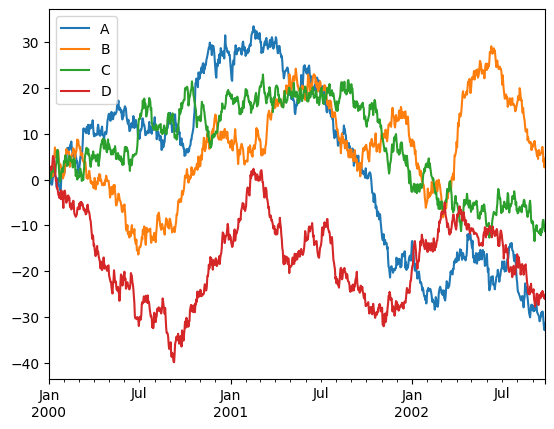

In [21]:
%matplotlib inline

df.plot();

In [24]:
import hvplot.pandas  # noqa

pd.options.plotting.backend = 'holoviews'

In [25]:
df.plot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [26]:
df.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

# Encoding problem

In [ ]:
%pip install charset-normalizer -U

In [29]:
my_byte_str = 'Bonjour, je suis à la recherche d\'une aide sur les étoiles'.encode('cp1252')
my_byte_str

b"Bonjour, je suis \xe0 la recherche d'une aide sur les \xe9toiles"

In [30]:
my_byte_str.decode('cp1252') == my_byte_str.decode('cp1256') == my_byte_str.decode('cp1258') == my_byte_str.decode('iso8859_14')

True